In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from typing import Any, List
import os
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import pickle
import seaborn as sns
from collections import defaultdict
import matplotlib as mpl
from concurrent.futures import ProcessPoolExecutor

import fathon  # Assuming you have the 'fathon' library installed
import numpy as np
import pandas as pd
from fathon import fathonUtils as fu

/home/ak/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import matplotlib as mpl


import itertools
colormap = plt.cm.RdBu
plt.style.use(os.path.join(mpl.get_configdir(),'latexstyle.mplstyle'))

In [3]:
figuresLocation = '/home/ak/Documents/Research/Papers/StylisedFactsPaper/figures'
HLPath = '/media/ak/T7/August11th2022Experiments/HiLoData/'
allHILOData = '/media/ak/T7/August11th2022Experiments/HiLoData/'
# os.listdir(allHILOData)

In [4]:

symbol = 'G_1'
regimeDirectories = [f for f in os.listdir(allHILOData) if str(symbol) in f ]

HiVolPath = os.path.join(allHILOData, regimeDirectories[0])
LoVolPath = os.path.join(allHILOData, regimeDirectories[1])
print(len(os.listdir(HiVolPath)), len(os.listdir(LoVolPath)), )

# ####### bar
bar ='volume'
############### 
var1 = 'GK_vol'
var2 = 'median_traded_volume'
result_dict = dict()
polOrd = 1
path = LoVolPath
barList = [f for f in os.listdir(path) if str(bar) in f]
print(len(barList))
listName = 'LoVol'
##### location -to - save
pathToSave = os.path.join(HLPath ,"_".join((symbol, bar, var1, var2, listName, 'DCCA.png')) )

################ ################ 
for f in barList:
    print(f)
    df = pd.read_pickle(os.path.join(path, f))
    if df.empty:
        print(f"Insufficient data for date {date}")
    #return NaN
    else:
        a1, b1 = np.asanyarray(df[str(var1)]), np.asanyarray(df[var2])
        pydcca_l = fathon.DCCA(a1, b1)
        date = f.split('regime')[1].split(".pkl")[0]
        print(date)
        winSizes = fu.linRangeByStep(20, min(len(a1), len(b1)), step=50)
        n, F = pydcca_l.computeFlucVec(winSizes, polOrd=polOrd)
        result = pydcca_l.fitFlucVec()

        # Check if the result is a tuple
        if isinstance(result, tuple):
            # Handle the tuple case
            result_dict.setdefault(date, {})
            result_dict[date]['n'],result_dict[date]['F'] = n.tolist(), F.tolist()

            H, H_intercept = pydcca_l.fitFlucVec()
            result_dict[date]['H'],result_dict[date]['H_intercept'] = H, H_intercept
            result_dict[date]['nrho'],rho = pydcca_l.computeRho(winSizes, polOrd=polOrd)
            result_dict[date]['rho'] = rho.tolist()
            pass
        elif isinstance(result, str) and result == "None":
            # Handle the case where result is "None" string
            # You might want to log this or take some specific action
            pass
        elif isinstance(result, str) and result == "At least two points are required.":
            # Handle the case where there are not enough points
            # Again, log this or take some specific action
            pass
        else:
            # Handle any other unexpected cases
            # It might be good to log this as an unexpected result
            pass
        pathToSave = os.path.join(HLPath ,"_".join((symbol, bar, var1, var2, listName, 'DCCA.pkl')) )
        print(pathToSave)
        with open(pathToSave, 'wb') as file:
            pickle.dump(result_dict, file)



# # Continue with the rest of your code


            
        

227 227
136
G_1_volume_lo_regime20180823.pkl
20180823
/media/ak/T7/August11th2022Experiments/HiLoData/G_1_volume_GK_vol_median_traded_volume_LoVol_DCCA.pkl
G_1_volume_lo_regime20180417.pkl
20180417
/media/ak/T7/August11th2022Experiments/HiLoData/G_1_volume_GK_vol_median_traded_volume_LoVol_DCCA.pkl
G_1_volume_lo_regime20180608.pkl
20180608
/media/ak/T7/August11th2022Experiments/HiLoData/G_1_volume_GK_vol_median_traded_volume_LoVol_DCCA.pkl
G_1_volume_lo_regime20180813.pkl
20180813
/media/ak/T7/August11th2022Experiments/HiLoData/G_1_volume_GK_vol_median_traded_volume_LoVol_DCCA.pkl
G_1_volume_lo_regime20180521.pkl
20180521
/media/ak/T7/August11th2022Experiments/HiLoData/G_1_volume_GK_vol_median_traded_volume_LoVol_DCCA.pkl
G_1_volume_lo_regime20180907.pkl
20180907
/media/ak/T7/August11th2022Experiments/HiLoData/G_1_volume_GK_vol_median_traded_volume_LoVol_DCCA.pkl
G_1_volume_lo_regime20180921.pkl
20180921
/media/ak/T7/August11th2022Experiments/HiLoData/G_1_volume_GK_vol_median_traded_vo

/media/ak/T7/August11th2022Experiments/HiLoData/G_1_volume_GK_vol_median_traded_volume_LoVol_DCCA.pkl
G_1_volume_lo_regime20180903.pkl
20180903
/media/ak/T7/August11th2022Experiments/HiLoData/G_1_volume_GK_vol_median_traded_volume_LoVol_DCCA.pkl
G_1_volume_lo_regime20180611.pkl
20180611
/media/ak/T7/August11th2022Experiments/HiLoData/G_1_volume_GK_vol_median_traded_volume_LoVol_DCCA.pkl
G_1_volume_lo_regime20180725.pkl
20180725
/media/ak/T7/August11th2022Experiments/HiLoData/G_1_volume_GK_vol_median_traded_volume_LoVol_DCCA.pkl
G_1_volume_lo_regime20180706.pkl
20180706
/media/ak/T7/August11th2022Experiments/HiLoData/G_1_volume_GK_vol_median_traded_volume_LoVol_DCCA.pkl
G_1_volume_lo_regime20180808.pkl
20180808
/media/ak/T7/August11th2022Experiments/HiLoData/G_1_volume_GK_vol_median_traded_volume_LoVol_DCCA.pkl
G_1_volume_lo_regime20181018.pkl
20181018
/media/ak/T7/August11th2022Experiments/HiLoData/G_1_volume_GK_vol_median_traded_volume_LoVol_DCCA.pkl
G_1_volume_lo_regime20180917.pkl
2

/media/ak/T7/August11th2022Experiments/HiLoData/G_1_volume_GK_vol_median_traded_volume_LoVol_DCCA.pkl
G_1_volume_lo_regime20180614.pkl
20180614
/media/ak/T7/August11th2022Experiments/HiLoData/G_1_volume_GK_vol_median_traded_volume_LoVol_DCCA.pkl
G_1_volume_lo_regime20180705.pkl
20180705
/media/ak/T7/August11th2022Experiments/HiLoData/G_1_volume_GK_vol_median_traded_volume_LoVol_DCCA.pkl
G_1_volume_lo_regime20180524.pkl
20180524
/media/ak/T7/August11th2022Experiments/HiLoData/G_1_volume_GK_vol_median_traded_volume_LoVol_DCCA.pkl
G_1_volume_lo_regime20180502.pkl
20180502
/media/ak/T7/August11th2022Experiments/HiLoData/G_1_volume_GK_vol_median_traded_volume_LoVol_DCCA.pkl
G_1_volume_lo_regime20181003.pkl
20181003
/media/ak/T7/August11th2022Experiments/HiLoData/G_1_volume_GK_vol_median_traded_volume_LoVol_DCCA.pkl
G_1_volume_lo_regime20180607.pkl
20180607
/media/ak/T7/August11th2022Experiments/HiLoData/G_1_volume_GK_vol_median_traded_volume_LoVol_DCCA.pkl
G_1_volume_lo_regime20180601.pkl
2

In [ ]:
pydcca_l.fitFlucVec()

In [ ]:
variables = ['micro_price',
 'price_imbalance',
 'pct_change_micro_price',
 'weighted_activity_spread',
 'GK_vol',
 'arrival_rates',
 'returns_normalised',
 'returns_mix_max',
 'skew',
 'kurt',
 'median_traded_volume']

### Plotting ###

In [15]:
path = '/media/ak/T7/August11th2022Experiments/HiLoData/HiLoDCCAData'
symbol = 'G_1'
symbolPath = os.path.join(path, symbol)
files = os.listdir(symbolPath)
hiFiles = [f for f in files if str('_hi') in f]
loFiles = [f for f in files if str('_lo') in f]

H_hi =dict()
H_lo = dict()
H_intercept_hi =dict()
H_intercept_lo =dict()

rho_hi = dict()
rho_lo = dict()

F_hi = dict()
F_lo = dict()


for idx in range(0, len(hiFiles)):
    unpickledDict = pd.read_pickle(os.path.join(symbolPath, hiFiles[0]))
    H_hi[idx] = unpickledDict['H']
    H_intercept_hi[idx] = unpickledDict['H_intercept']
    rho_hi[idx] = unpickledDict['rho']
    F_hi[idx] = unpickledDict['F']
    
for idx in range(0, len(loFiles)):
    unpickledDict_l = pd.read_pickle(os.path.join(symbolPath, loFiles[0]))
    H_lo[idx] = unpickledDict_l['H']
    H_intercept_lo[idx] = unpickledDict_l['H_intercept']
    rho_lo[idx] = unpickledDict_l['rho']
    F_lo[idx] = unpickledDict_l['F']


In [25]:
file = 'TY1_volume_GK_vol_median_traded_volume_HiVol_DCCA.pkl'
dictFV1 =pd.read_pickle( os.path.join(HLPath, file))

FileNotFoundError: [Errno 2] No such file or directory: '/media/ak/T7/August11th2022Experiments/HiLoData/TY1_volume_GK_vol_median_traded_volume_HiVol_DCCA.pkl'

In [17]:
# _=plt.hist(pd.DataFrame.from_dict(rho_hi).median(axis=1), bins = 10)
# _ = plt.hist(pd.DataFrame.from_dict(rho_lo).median(axis=1), bins =10)

# _=plt.hist(pd.DataFrame.from_dict(F_hi).median(axis=1), bins = 10)
# _ = plt.hist(pd.DataFrame.from_dict(F_lo).median(axis=1), bins =10)

In [ ]:
# _=plt.hist(pd.DataFrame.from_dict(F_hi).median(axis=1), bins = 10)
# _ = plt.hist(pd.DataFrame.from_dict(F_lo).median(axis=1), bins =10)

In [32]:
import os
import pandas as pd

path = '/media/ak/T7/August11th2022Experiments/HiLoData/HiLoDCCAData'

symbol = 'G_1'
bar = 'tick'
symbolPath = os.path.join(path, symbol)
files = os.listdir(symbolPath)

# Splitting the files list into hi and lo files using list comprehensions
hiFiles = [f for f in files if '_hi' in f]
loFiles = [f for f in files if '_lo' in f]

# Function to process files and extract data
def process_files(file_list, symbol_path):
    data = {'H': {}, 'H_intercept': {}, 'rho': {}, 'F': {}}
    for idx, file in enumerate(file_list):
        unpickled_dict = pd.read_pickle(os.path.join(symbol_path, file))
        for key in data.keys():
            data[key][idx] = unpickled_dict[key]
    return data

# Processing hi and lo files
data_hi = process_files(hiFiles, symbolPath)
data_lo = process_files(loFiles, symbolPath)

# Assigning the data to respective variables
H_hi, H_intercept_hi, rho_hi, F_hi = data_hi.values()
H_lo, H_intercept_lo, rho_lo, F_lo = data_lo.values()


In [33]:
rho_lo

{0: array([ 0.0069829 ,  0.00527887,  0.00357523,  0.00411131,  0.00137585,
        -0.00279864, -0.00192857,  0.00436008, -0.00234069,  0.0049317 ,
        -0.01637587, -0.00909888,  0.00362763, -0.00404408, -0.00451854,
        -0.00038988]),
 1: array([ 0.00413051, -0.00372141, -0.00138026, -0.00582833, -0.00405928,
        -0.00266022, -0.00587119, -0.00431522, -0.00518053, -0.00901744,
        -0.00736359, -0.00726334, -0.00803313, -0.00903451, -0.00783371,
        -0.01114776, -0.01277871, -0.00648055, -0.01363346, -0.00513209,
        -0.0127764 , -0.00664566, -0.01338456, -0.00772982, -0.01303831,
        -0.01444301, -0.01321187, -0.00565795, -0.01362271, -0.01307154,
        -0.01222135, -0.00817923, -0.00541934, -0.01206303, -0.01502623,
        -0.01422825, -0.01361492, -0.01081725, -0.00729618, -0.02093698,
        -0.01084358, -0.01124869, -0.01173609, -0.01326713, -0.01398065,
        -0.01341534, -0.01102063, -0.00939769, -0.00698326, -0.02256755,
        -0.0228209 , -

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_histograms(rho_hi, rho_lo, F_hi, F_lo, legend_rho, legend_F, 
                    xlabels, ylabels, tick_size, save_path, colors_rho, colors_F,dpi=300):
    """
    Plot histograms of rho and F, side by side, handling data of unequal lengths.
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Function to calculate medians of dictionary values
    def median_of_dict(d):
        return pd.Series({k: pd.Series(v).median() for k, v in d.items()})

    # Calculate medians
    rho_hi_median = median_of_dict(rho_hi)
    rho_lo_median = median_of_dict(rho_lo)
    F_hi_median = median_of_dict(F_hi)
    F_lo_median = median_of_dict(F_lo)

    # Plotting rho_hi and rho_lo
    sns.histplot(rho_hi_median, bins=10, ax=axes[0], kde=True, 
                 label=legend_rho[0],color=colors_rho[0])
    sns.histplot(rho_lo_median, bins=10, ax=axes[0], kde=True, 
                 label=legend_rho[1],color=colors_rho[1])
    axes[0].set_xlabel(xlabels[0],fontsize = 20)
    axes[0].set_ylabel(ylabels[0],fontsize = 20)
    axes[0].tick_params(axis='both', labelsize=tick_size)
    axes[0].legend()

    # Plotting F_hi and F_lo
    sns.histplot(F_hi_median, bins=10, ax=axes[1], kde=True, label=legend_F[0],color=colors_F[0])
    sns.histplot(F_lo_median, bins=10, ax=axes[1], kde=True, label=legend_F[1],color=colors_F[1])
    axes[1].set_xlabel(xlabels[1], fontsize = 20)
    axes[1].set_ylabel(ylabels[1], fontsize = 20)
    axes[1].tick_params(axis='both', labelsize=tick_size)
    axes[1].legend()

    # Save the plot
    plt.tight_layout()
    plt.savefig(save_path, dpi=dpi)

    # Show the plot
    plt.show()


/home/ak/Documents/Research/Papers/StylisedFactsPaper/figures/tick_G_1_DCCA.png


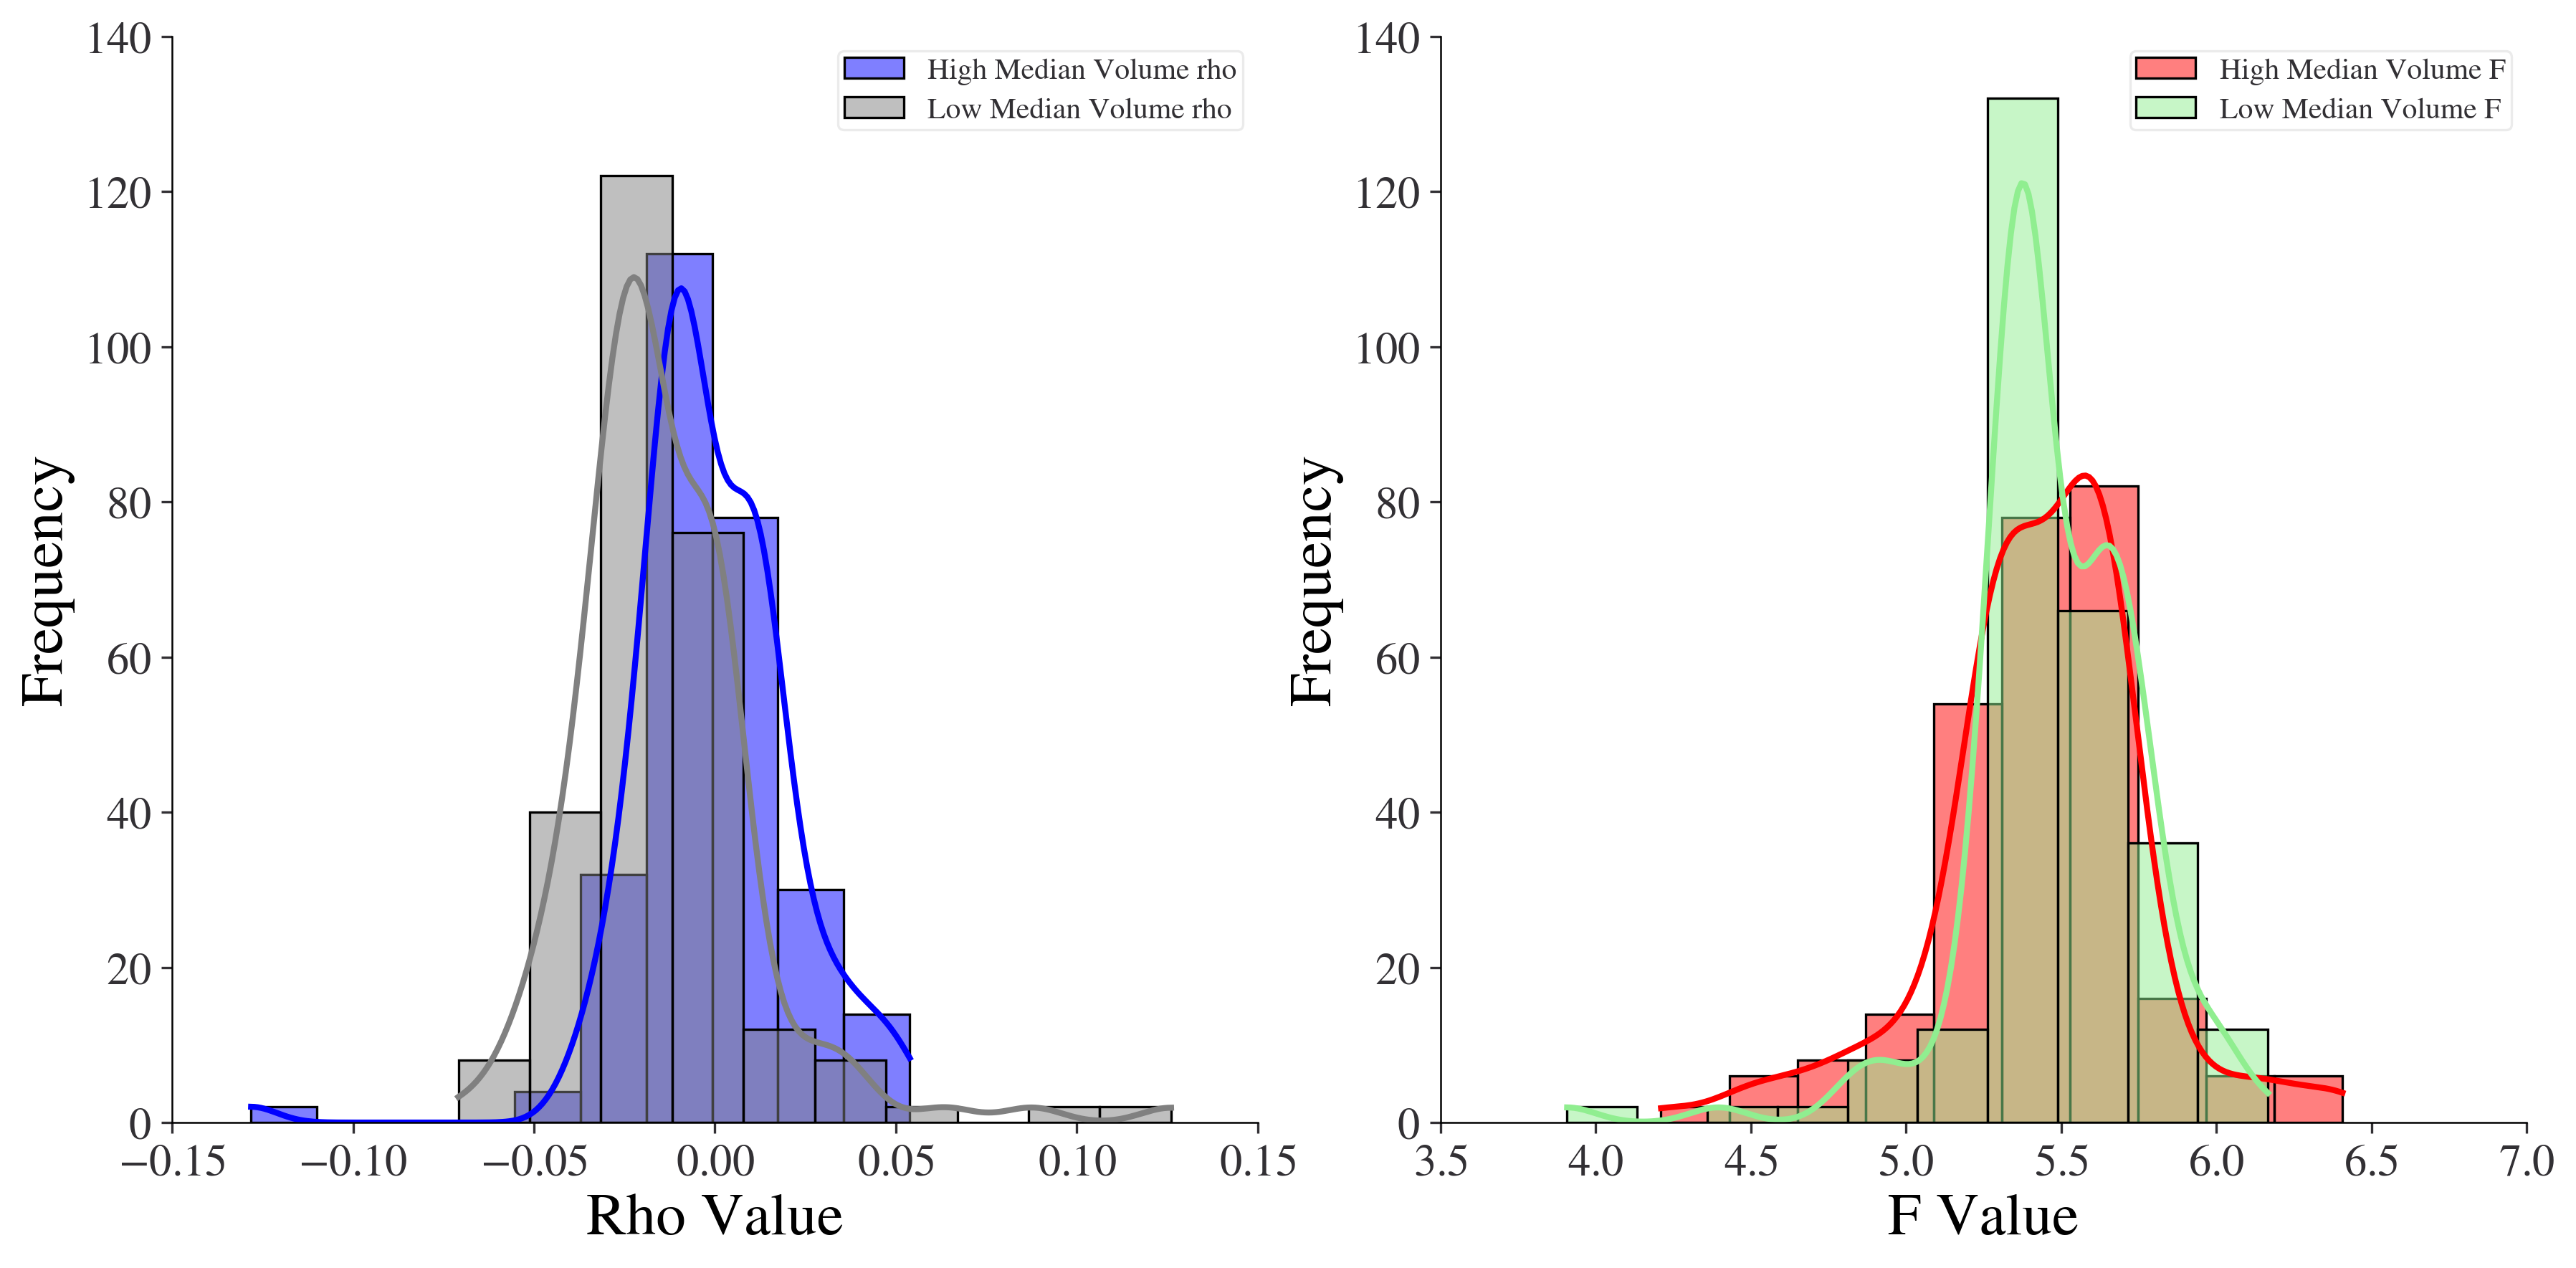

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
title = "_".join((str(bar), str(symbol), 'DCCA.png'))
fullpath = os.path.join(figuresLocation, title)
                 
print(fullpath)
# Call the function
plot_histograms(
    rho_hi, rho_lo, F_hi, F_lo,
    legend_rho=["High Median Volume rho", "Low Median Volume rho"],
    legend_F=["High Median Volume F", "Low Median Volume F"],
    xlabels=["Rho Value", "F Value"],
    ylabels=["Frequency", "Frequency"],
    tick_size=15,
    save_path=fullpath,
    colors_rho=["blue", "grey"],  # Colors for the rho histogram
    colors_F=["red", "lightgreen"],    # Colors for the F histogram
    dpi=300
)
